# import required module

In [732]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pywt
import tensorflow as tf1
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

# Load data-set

In [733]:
# label=["S0","S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9", "Activity"]

df=pd.read_csv("/home/ranjit/python_uhd_install/Dataset_Preparation/All_Activity.csv")
df

,Time_stamp_sec,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,Activity
0,7.152557e-07,0.012162,0.005372,0.005689,0.006941,0.013136,0.013164,0.015125,0.003927,0.011982,...,-1.431029,1.658715,-2.660998,2.919511,2.608629,-2.768291,0.670073,-3.005982,-0.881872,Walking
1,4.227595e-01,0.019417,0.004365,0.017467,0.012783,0.005486,0.005640,0.002650,0.005744,0.002402,...,2.632000,-2.480699,-2.531461,2.562904,-2.713858,-2.149658,-1.692947,-1.016725,3.072117,Walking
2,7.368343e-01,0.002404,0.013390,0.011502,0.010158,0.003352,0.009591,0.002527,0.019817,0.005339,...,-2.106238,2.369294,1.416724,0.993940,2.527769,-2.504044,1.013208,-2.877881,-3.029874,Walking
3,9.805675e-01,0.010619,0.015050,0.018699,0.000319,0.011122,0.007625,0.011456,0.020549,0.002775,...,1.775891,-1.555613,-2.156544,0.383077,2.957304,1.570796,-2.965438,2.408399,3.080692,Walking
4,1.215650e+00,0.006574,0.007201,0.004724,0.001101,0.009369,0.004236,0.011648,0.011491,0.006268,...,-0.565492,0.493544,-0.448955,-0.214734,-0.395782,-0.261944,-1.993352,-1.846545,-0.208426,Walking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,3.565157e+02,0.300294,0.166791,0.155930,0.024595,0.063003,0.073611,0.245571,0.103749,0.054041,...,1.565846,0.997995,1.061936,1.088682,1.215235,0.899895,0.958297,1.173681,1.123351,No_Activity
2197,3.572718e+02,0.222309,0.209594,0.209616,0.154318,0.239492,0.293416,0.129744,0.316540,0.252837,...,2.341387,2.811029,1.826611,0.580882,0.693593,0.236914,0.715073,-2.321794,0.828111,No_Activity
2198,3.579822e+02,0.138792,0.216504,0.713957,0.384248,0.227561,0.076942,0.409022,0.030229,0.316751,...,-2.378767,-2.427357,-2.389044,-2.470082,-2.409881,-2.558775,0.674806,0.868363,-0.782270,No_Activity
2199,3.587376e+02,0.241029,0.181942,0.236581,0.113624,0.205489,0.291535,0.390994,0.173994,0.329688,...,-2.383065,0.677491,0.826752,-2.245926,2.856896,-0.948657,2.320912,2.331203,-0.846382,No_Activity


# Visualization of dataset

<AxesSubplot:title={'center':'Total number of sample Vs Activity'}>

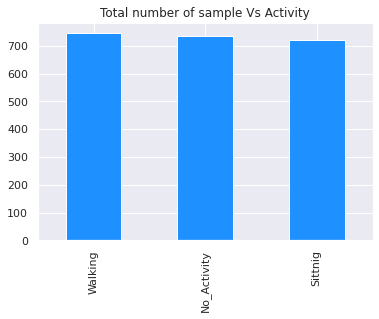

In [734]:
sns.set(color_codes=True)
df['Activity'].value_counts().plot(kind='bar',color="dodgerblue",title='Total number of sample Vs Activity')


In [735]:
dataset_amp=df.iloc[:,1:-1].values
dataset_labels=df.iloc[:,-1]
Time_stamp=df.iloc[:,0]
# dataset_amp
# dataset_labels
# Time_stamp

Text(0, 0.5, 'Amplitudes')

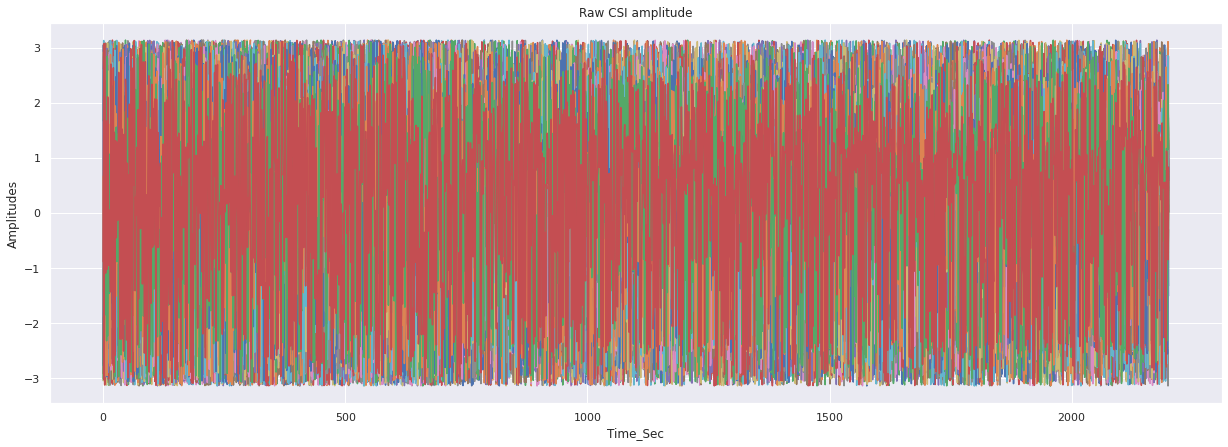

In [736]:
fig = plt.figure(figsize = (21, 7))
plt.plot(dataset_amp)
plt.title("Raw CSI amplitude")
plt.xlabel('Time_Sec')
plt.ylabel('Amplitudes')


Text(0.5, 1.0, 'Raw CSI amplitude Spectrogram')

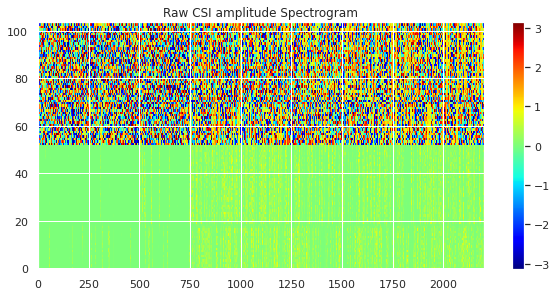

In [737]:
fig = plt.figure(figsize = (22, 10))
ax1 = fig.add_subplot(221)
im = plt.imshow((dataset_amp).T,interpolation = "nearest", aspect = "auto", cmap="jet", origin='lower')
plt.colorbar()
ax1.set_title("Raw CSI amplitude Spectrogram")

# PCA

## Noise reduction using PCA

Text(0, 0.5, 'Amplitudes')

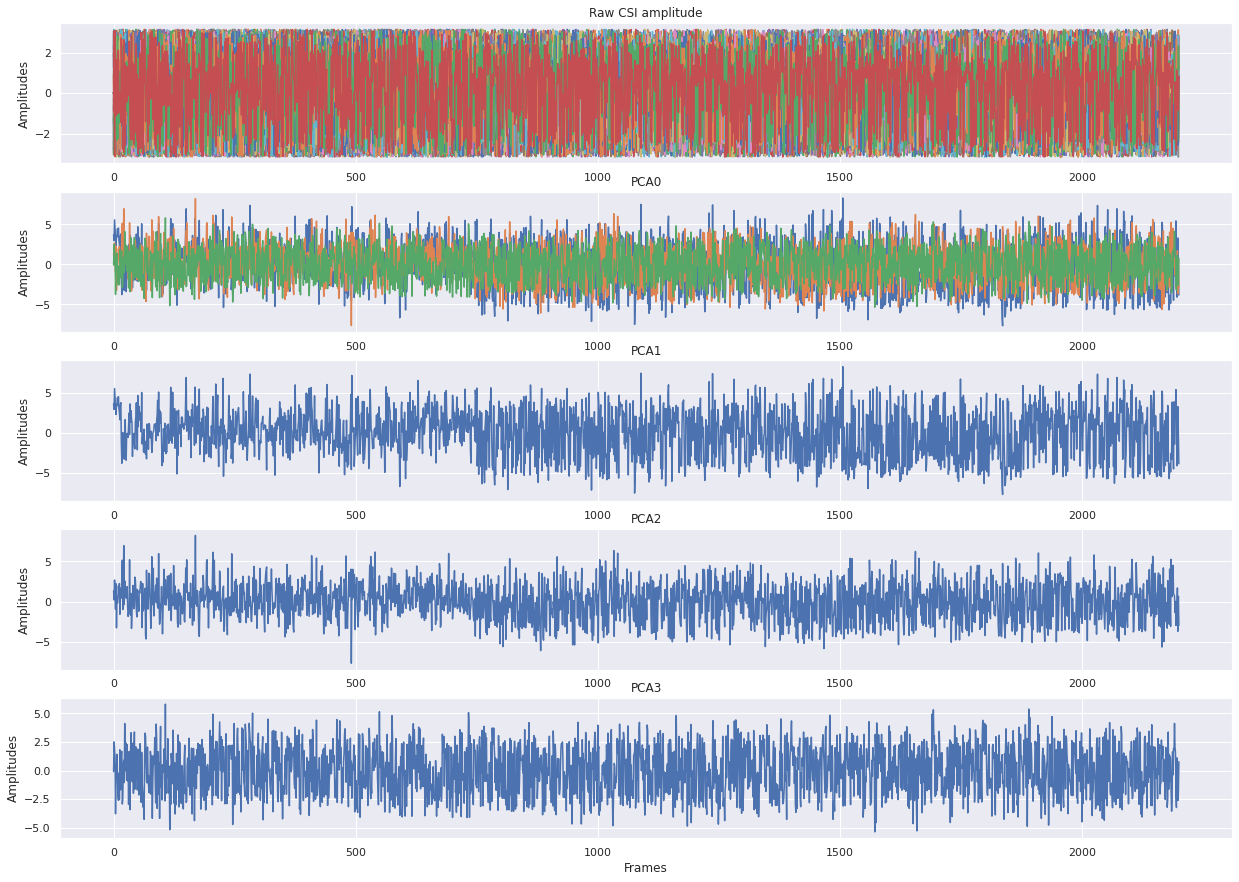

In [738]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=3)
amp1_pca = pca.fit_transform(dataset_amp)

# print("amp1_pca: ", amp1_pca)

fig = plt.figure(figsize = (21, 15))
ax = plt.subplot(511)
plt.plot(dataset_amp)
plt.title("Raw CSI amplitude")
plt.ylabel('Amplitudes')

ax1 = plt.subplot(512)
plt.plot(amp1_pca)
ax1.set_title("PCA0")
plt.ylabel('Amplitudes')

ax2 = plt.subplot(513)
plt.plot(amp1_pca.T[0])
ax2.set_title("PCA1")
plt.ylabel('Amplitudes')

ax3 = plt.subplot(514)
plt.plot(amp1_pca.T[1])
ax3.set_title("PCA2")
plt.ylabel('Amplitudes')

ax4 = plt.subplot(515)
plt.plot(amp1_pca.T[2])
ax4.set_title("PCA3")
plt.xlabel('Frames')
plt.ylabel('Amplitudes')


# DWT for Noise reduction and features extraction

## Required function

In [739]:
def madev(d,axis=None): # Mean absolute deviation of a signal
    return np.mean(np.absolute(d-np.mean(d,axis)),axis)


def wavelet_denoising(x, wavelet='db4', level=6):                                   
    coeff = pywt.wavedec(x, wavelet, mode="symmetric") #symmetric, per, zero, constant, reflect, smooth,
#     print(np.array(coeff)[0].shape)
    sigma = (1/0.6745) * madev(coeff[0][1])
    
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='soft') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='symmetric')



'''
def DWT_noise(vals, th=10):
    threshold = th # Threshold for filtering

    data = vals.copy() 
    # print("data: ", data.shape)

    w = pywt.Wavelet('sym5')
    maxlev = pywt.dwt_max_level(data.shape[1], w.dec_len)
    # print("maximum level is " + str(maxlev))
    
    # Decompose into wavelet components, to the level selected:
    coeffs = pywt.wavedec(data, 'sym5', level=maxlev)
    
    
    #plt.figure()
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))
    datarec = pywt.waverec(coeffs, 'sym5')
    return datarec

'''


'\ndef DWT_noise(vals, th=10):\n    threshold = th # Threshold for filtering\n\n    data = vals.copy() \n    # print("data: ", data.shape)\n\n    w = pywt.Wavelet(\'sym5\')\n    maxlev = pywt.dwt_max_level(data.shape[1], w.dec_len)\n    # print("maximum level is " + str(maxlev))\n    \n    # Decompose into wavelet components, to the level selected:\n    coeffs = pywt.wavedec(data, \'sym5\', level=maxlev)\n    \n    \n    #plt.figure()\n    for i in range(1, len(coeffs)):\n        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))\n    datarec = pywt.waverec(coeffs, \'sym5\')\n    return datarec\n\n'

Text(0.5, 1.0, 'DWT Noise removal')

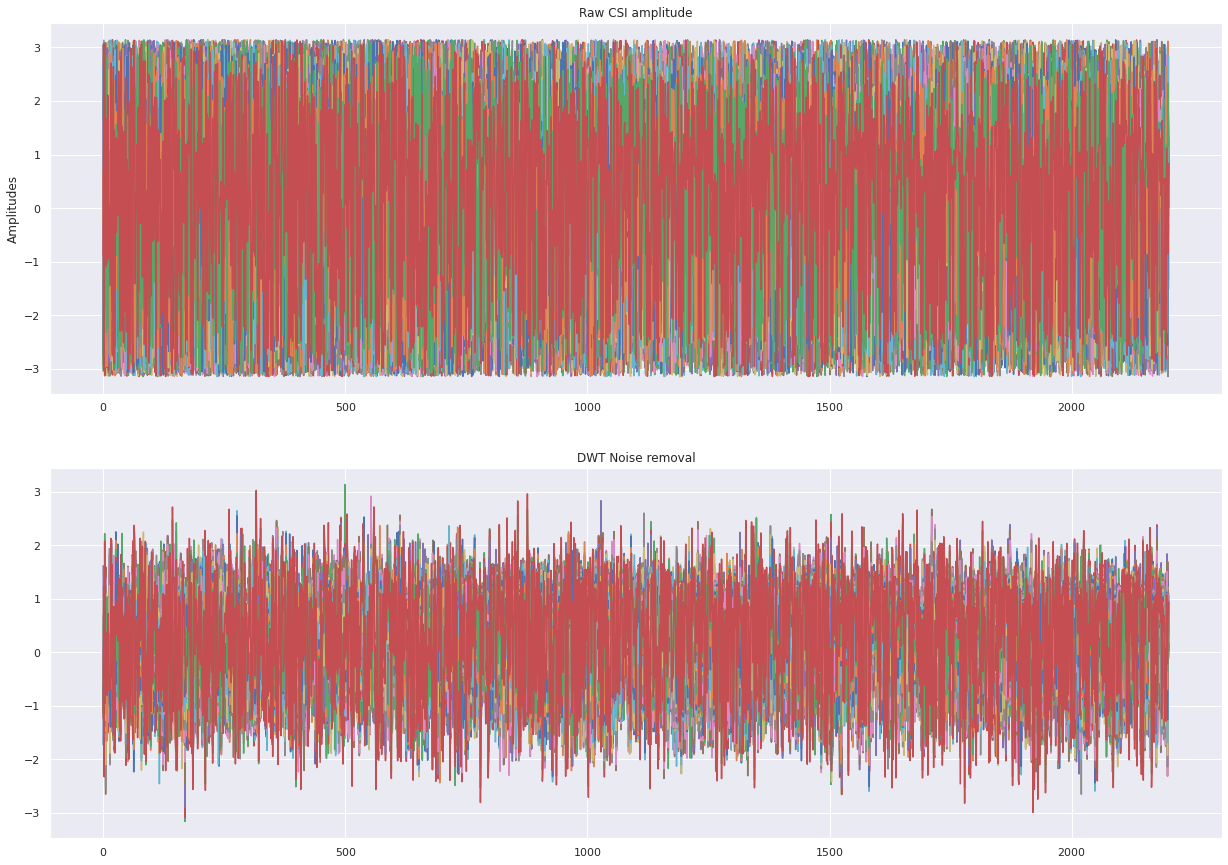

In [740]:
fig = plt.figure(figsize = (21, 15))

ax = plt.subplot(211)
plt.plot(dataset_amp)
plt.title("Raw CSI amplitude")
plt.ylabel('Amplitudes')

ax = plt.subplot(212)
amp1_with_dwt = wavelet_denoising(dataset_amp)
plt.plot(amp1_with_dwt)
plt.title("DWT Noise removal")

## Dimensionality Reduction using PCA

### Mathematically the main objective of PCA is to:
1. Find an orthonormal basis for the data.
2. Sort dimensions in the order of importance.
3. Discard the low significance dimensions.
4. Focus on uncorrelated and Gaussian components.

### Steps involved in PCA
1. Standardize the PCA.
2. Calculate the covariance matrix.
3. Find the eigenvalues and eigenvectors for the covariance matrix.
4. Plot the vectors on the scaled data.

##  1. Standardizing the features

In [741]:
from sklearn.preprocessing import StandardScaler
std_features = StandardScaler().fit_transform(amp1_pca)
x

2

In [742]:
# fig = plt.figure(figsize = (21, 7))
# plt.plot(x)

## 2. Create a covariance matrix:

In [743]:
cov_data = np.corrcoef(std_features.T)
# cov_data

### Plot the covariance matrix to identify the correlation between features using a heatmap

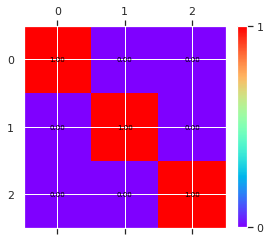

In [744]:
img = plt.matshow(cov_data, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data[x,y], size=7, color='black', ha="center", va="center")
        

plt.show()

# PCA Projection to 2D

In [745]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(std_features)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

principalDf

,PC1,PC2
0,1.227101,0.528511
1,0.987169,0.367853
2,1.858683,1.291305
3,1.496502,0.415017
4,1.175792,-0.818531
...,...,...
2196,-1.373729,-0.078752
2197,0.188207,0.741034
2198,1.100942,-1.809206
2199,0.029883,0.037519


In [746]:
finalDf = pd.concat([principalDf, df[['Activity']]], axis = 1)
finalDf

,PC1,PC2,Activity
0,1.227101,0.528511,Walking
1,0.987169,0.367853,Walking
2,1.858683,1.291305,Walking
3,1.496502,0.415017,Walking
4,1.175792,-0.818531,Walking
...,...,...,...
2196,-1.373729,-0.078752,No_Activity
2197,0.188207,0.741034,No_Activity
2198,1.100942,-1.809206,No_Activity
2199,0.029883,0.037519,No_Activity


In [747]:
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('PC1', fontsize = 15)
# ax.set_ylabel('PC2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
# Activity = ['Sitting', 'Walking', 'No_Person']
# colors = ['r', 'g', 'b']
# for Activity, color in zip(Activity,colors):
#     indicesToKeep = finalDf['Activity'] == Activity
#     ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
#                , finalDf.loc[indicesToKeep, 'PC2']
#                , c = color
#                , s = 50)
# ax.legend(Activity)
# ax.grid()

# Visualize all activity

In [748]:
# def plot_activity(Activity, dataset):
#     label=[]

#     data = df[df['Activity'] == Activity][["S0","S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9"]][:100]
#     axis = data.plot(subplots=True, figsize=(16, 12), title=Activity)
    
#     for ax in axis:
#         ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

In [749]:
# plot_activity("Walking", df)

In [750]:
# plot_activity("Sitting", df)

In [751]:
# plot_activity("No_Person", df)

In [752]:
# plot_activity("Falling", df)

# Data Preprocessing

In [753]:
from scipy import stats

num_time_steps = 1
num_features=2
step = 1
segments = []
labels = []
for i in range(0, len(df) - num_time_steps, step):
    S0 = finalDf['PC1'].values[i: i + num_time_steps]
    S1 = finalDf['PC2'].values[i: i + num_time_steps]
#     S2 = finalDf['PC3'].values[i: i + num_time_steps]
#     S3 = df['S3'].values[i: i + num_time_steps]
#     S4 = df['S4'].values[i: i + num_time_steps]
#     S5 = df['S5'].values[i: i + num_time_steps]
#     S6 = df['S6'].values[i: i + num_time_steps]
#     S7 = df['S7'].values[i: i + num_time_steps]
#     S8 = df['S8'].values[i: i + num_time_steps]
#     S9 = df['S9'].values[i: i + num_time_steps]
    
    
    
    label = stats.mode(df['Activity'][i: i + num_time_steps])[0][0]
#     segments.append([S0,S1,S2,S3,S4,S5,S6,S7,S8,S9])
    segments.append([S0,S1])

    
    labels.append(label)

In [754]:
np.array(segments).shape

(2200, 2, 1)

# Transfering shape of segment

In [755]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, num_time_steps, num_features)


# One-Hot encoding on label (Walking, Sitting, ....)

In [756]:
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

reshaped_segments.shape

(2200, 1, 2)

In [757]:
# labels[0]

# K- fold cross Validation

In [758]:
# from sklearn.model_selection import cross_val_score
# a=cross_val_score(classifier,X_train, Y_train,cv=10,scoring='accuracy')
# # Score of K-fold cross validation
# a.mean()

# Split the dataset into training (70%) and testing (30%)

In [759]:
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size=0.3, random_state=RANDOM_SEED)



In [760]:
len(X_train)

1540

In [761]:
len(X_test)

660

# Building the model -- LSTM
Our model contains 2 fully-connected and 2 LSTM layers (stacked on each other) with 64 units each:

In [762]:
num_classes = 3
num_hidden_layer = 64

In [763]:
def create_LSTM_model(inputs):
    W = {
        'hidden': tf1.Variable(tf.random_normal([num_features, num_hidden_layer])),
        'output': tf1.Variable(tf.random_normal([num_hidden_layer, num_classes]))
    }
    biases = {
        'hidden': tf1.Variable(tf.random_normal([num_hidden_layer], mean=1.0)),
        'output': tf1.Variable(tf.random_normal([num_classes]))
    }
    
    X = tf.transpose(inputs, [1, 0, 2])
    X = tf.reshape(X, [-1, num_features])
    hidden = tf.nn.relu(tf.matmul(X, W['hidden']) + biases['hidden'])
    hidden = tf.split(hidden, num_time_steps, 0)

    # Stack 2 LSTM layers
    lstm_layers = [tf.compat.v1.nn.rnn_cell.LSTMCell(num_hidden_layer, forget_bias=1.0) for _ in range(2)]
    
    lstm_layers = tf.keras.layers.StackedRNNCells(lstm_layers)


    outputs, _ = tf.compat.v1.nn.static_rnn(lstm_layers, hidden, dtype=tf.float32)

    # Get output for the last time step
    lstm_last_output = outputs[-1]

    return tf.matmul(lstm_last_output, W['output']) + biases['output']


# Creating Placeholders:

In [764]:
tf.compat.v1.reset_default_graph() # To clear default graph

X = tf.placeholder(tf.float32, [None, num_time_steps, num_features], name="input") # X values that must be feed using feed dict
Y = tf.placeholder(tf.float32, [None, num_classes]) # Y values that must be feed using feed dict

In [765]:
pred_Y = create_LSTM_model(X)
pred_softmax = tf.nn.softmax(pred_Y, name="y_")

In [766]:
L2_LOSS = 0.00015

l2 = L2_LOSS * \
    sum(tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables())

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred_Y, labels = Y)) + l2

In [767]:
LEARNING_RATE = 0.00015

optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss)

correct_pred = tf.equal(tf.argmax(pred_softmax, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

# Training

In [768]:
num_epochs=50
BATCH_SIZE = 1024

In [769]:
saver = tf.train.Saver()

history = dict(train_loss=[], 
                     train_acc=[], 
                     test_loss=[], 
                     test_acc=[])

sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

train_count = len(X_train)

for i in range(1, num_epochs + 1):
    for start, end in zip(range(0, train_count, BATCH_SIZE),range(BATCH_SIZE, train_count + 1,BATCH_SIZE)):
        sess.run(optimizer, feed_dict={X: X_train[start:end],
                                       Y: y_train[start:end]})

    _, acc_train, loss_train = sess.run([pred_softmax, accuracy, loss], feed_dict={ X: X_train, Y: y_train})

    _, acc_test, loss_test = sess.run([pred_softmax, accuracy, loss], feed_dict={ X: X_test, Y: y_test})

    history['train_loss'].append(loss_train)
    history['train_acc'].append(acc_train)
    history['test_loss'].append(loss_test)
    history['test_acc'].append(acc_test)

    if i != 1 and i % 5 != 0:
        continue

    print(f'epoch: {i} test accuracy: {acc_test*100}% loss: {loss_test}')
    
predictions, acc_final, loss_final = sess.run([pred_softmax, accuracy, loss], feed_dict={X: X_test, Y: y_test})

print()

print(f'final results: accuracy: {acc_final*100}% loss: {loss_final}')


epoch: 1 test accuracy: 41.969695687294006% loss: 1.4053207635879517
epoch: 5 test accuracy: 43.484848737716675% loss: 1.362173080444336
epoch: 10 test accuracy: 44.24242377281189% loss: 1.3124207258224487
epoch: 15 test accuracy: 45.606061816215515% loss: 1.2671947479248047
epoch: 20 test accuracy: 45.9090918302536% loss: 1.226540207862854
epoch: 25 test accuracy: 45.15151381492615% loss: 1.1909016370773315
epoch: 30 test accuracy: 45.606061816215515% loss: 1.1611992120742798
epoch: 35 test accuracy: 48.181816935539246% loss: 1.1385492086410522
epoch: 40 test accuracy: 48.0303019285202% loss: 1.1235041618347168
epoch: 45 test accuracy: 47.121211886405945% loss: 1.115077257156372
epoch: 50 test accuracy: 45.75757682323456% loss: 1.110605001449585

final results: accuracy: 45.75757682323456% loss: 1.110605001449585


In [770]:
import pickle  # implements binary protocols for serializing and de-serializing a Python object structure

history = pickle.load(open("history.p", "rb"))
# predictions = pickle.load(open("predictions.p", "rb"))


# Evaluation

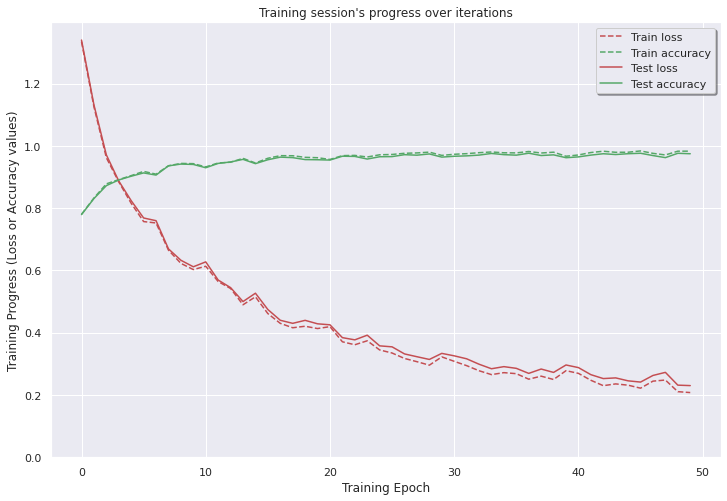

In [771]:
plt.figure(figsize=(12, 8))

plt.plot(np.array(history['train_loss']), "r--", label="Train loss")
plt.plot(np.array(history['train_acc']), "g--", label="Train accuracy")

plt.plot(np.array(history['test_loss']), "r-", label="Test loss")
plt.plot(np.array(history['test_acc']), "g-", label="Test accuracy")

plt.title("Training session's progress over iterations")
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Training Progress (Loss or Accuracy values)')
plt.xlabel('Training Epoch')
plt.ylim(0)

plt.show()

In [772]:
LABELS = ['Walking','Sitting','No_Person']

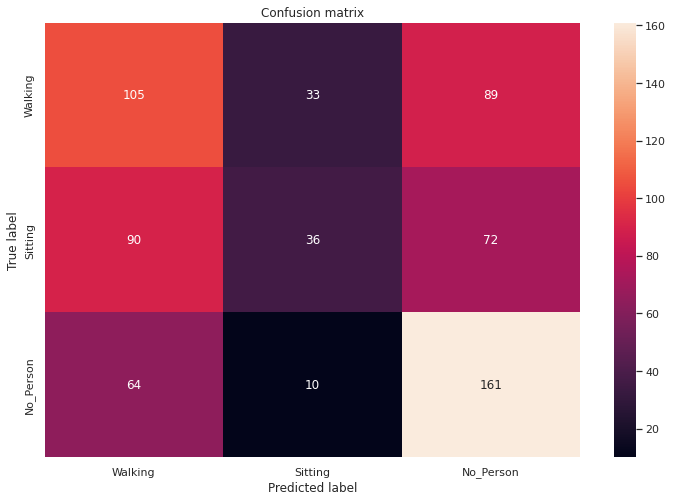

In [773]:
from sklearn.metrics import confusion_matrix

max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)

confusion_matrix = confusion_matrix(max_test, max_predictions)


plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

## Precision, Recall and F1 score

In [774]:
from sklearn.metrics import precision_score , recall_score, f1_score

# Precision Score
# precision_score(y_test, predictions)

# print(np.shape(predictions))
# print(np.shape(y_test))
# print(predictions.size)

# print(np.concatenate((predictions.reshape((predictions.size),1),y_test.reshape((y_test.size),1)),1))

# precision_score(np.concatenate((predictions.reshape((predictions.size),1),y_test.reshape((y_test.size),1)),1))




In [775]:
# from sklearn.metrics import precision_recall_curve
# # For thershold value
# y_score=cross_val_predict(classifier,X_train, Y_train,cv=3, method="decision_function")